In [23]:
#1. Import Libraries and Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load dataset
data = pd.read_csv('heartdisease.csv')


In [ ]:
#2. Exploratory Data Analysis (EDA)
# Univariate Analysis
data.describe()
sns.histplot(data['BMI'], kde=True)
plt.show()

# Multivariate Analysis
sns.heatmap(data.corr(), annot=True)
plt.show()


In [ ]:
# Handle class imbalance
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


In [ ]:
#4. Model Experimentation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name}:\n{classification_report(y_test, y_pred)}")


In [ ]:
#5. Precision-Recall Curves
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_scores = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [ ]:
#List out the most important drivers of heart disease or attack.

# Feature importance for Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance)


In [ ]:
#Create an end-to-end training and inference pipeline.

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

pipeline.fit(X_train, y_train)


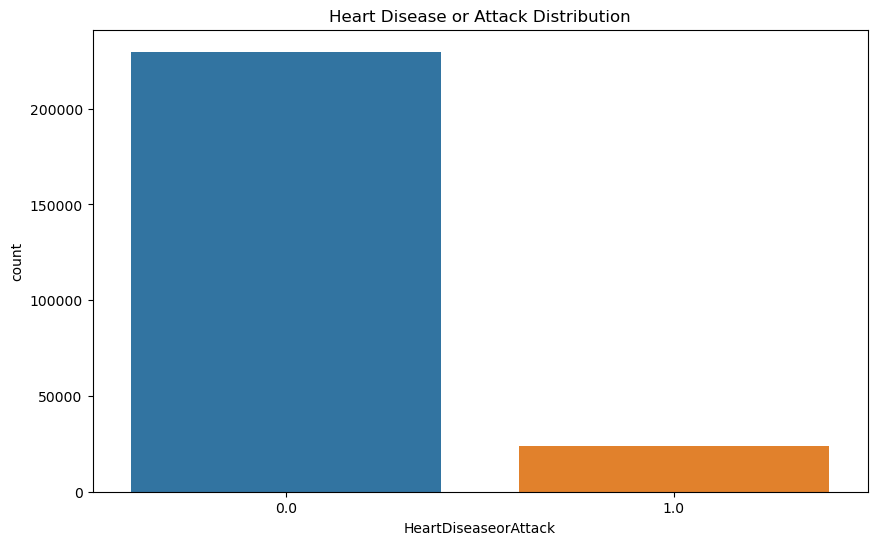

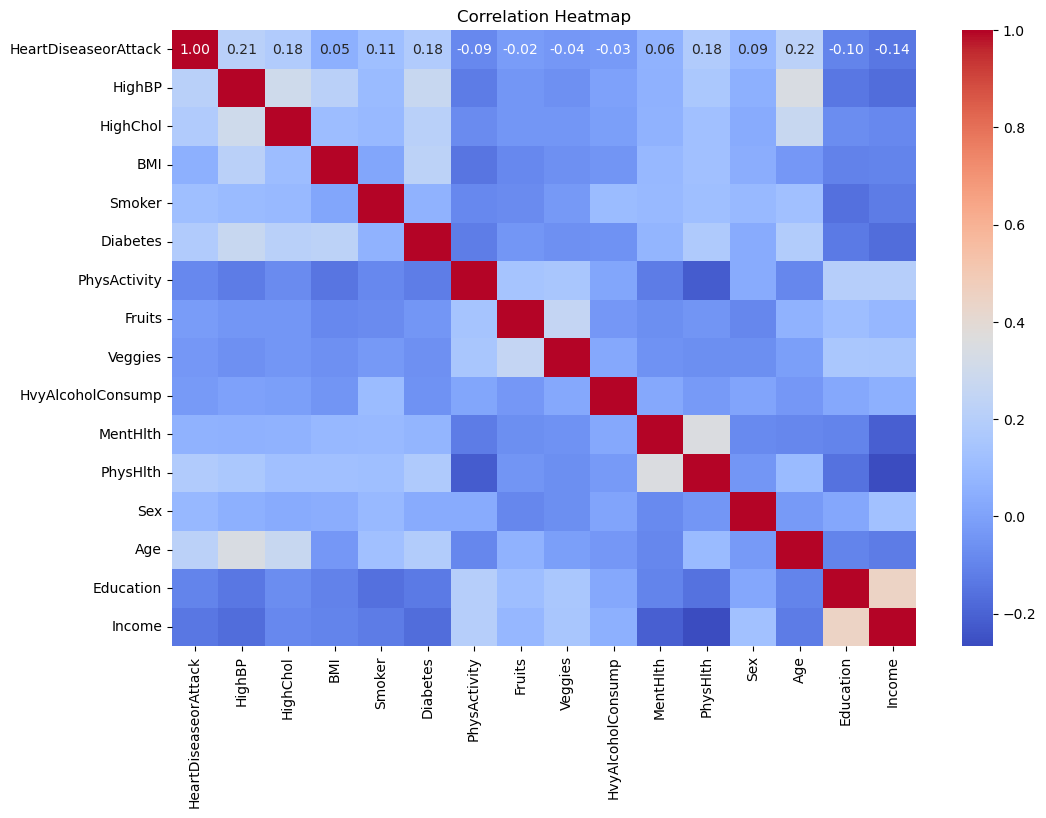

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     45968
         1.0       0.31      0.11      0.16      4768

    accuracy                           0.89     50736
   macro avg       0.61      0.54      0.55     50736
weighted avg       0.86      0.89      0.87     50736

[[44815  1153]
 [ 4258   510]]


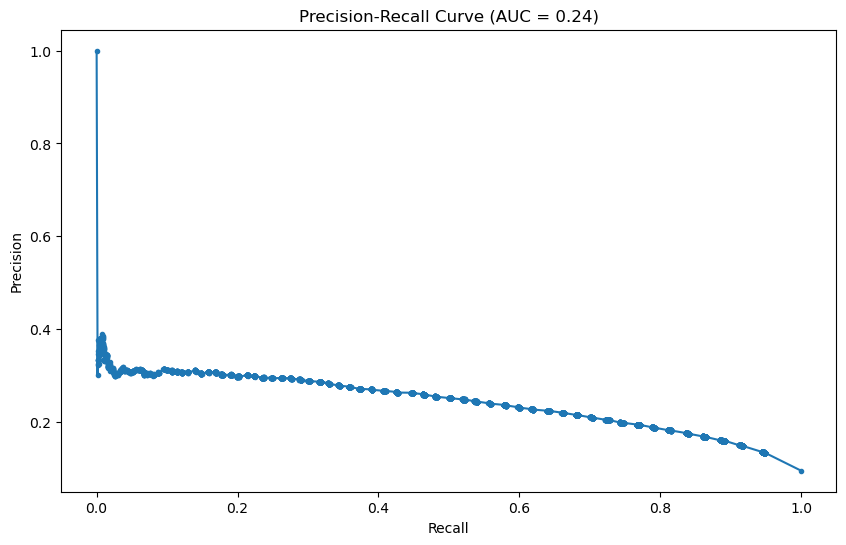

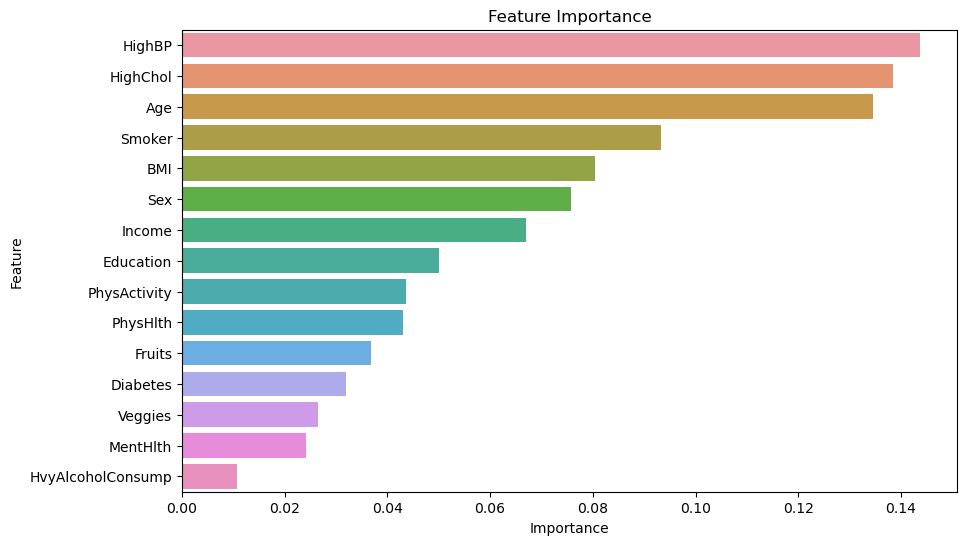

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     45968
         1.0       0.31      0.11      0.16      4768

    accuracy                           0.89     50736
   macro avg       0.61      0.54      0.55     50736
weighted avg       0.86      0.89      0.87     50736



In [30]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

# Step 2: Load Dataset
df = pd.read_csv('heartdisease.csv')

# Step 3: Exploratory Data Analysis (EDA)

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HeartDiseaseorAttack')
plt.title('Heart Disease or Attack Distribution')
plt.show()

# Multivariate Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Feature Engineering
# Example: You could bin age or create interaction terms if needed.

# Step 5: Prepare the Data
X = df.drop(columns=['HeartDiseaseorAttack'])
y = df['HeartDiseaseorAttack']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 7: Model Training
# Example using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 8: Model Evaluation
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Precision-Recall Curve
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title(f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Step 9: Feature Importance
importance = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()



# Additional: Using model pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
print(classification_report(y_test, y_pred_pipeline))
